# Comparative analysis between Differential Evolution Clustering and Expectation-Maximization

In [49]:
import DEC.standard_dec as sdec
import EM.expectation_maximization as em
import matplotlib.pyplot as plt
import pandas as pd
import os

from sklearn.preprocessing import StandardScaler
from sklearn import metrics
%matplotlib inline

In [2]:
DATA_DIR = "data"
N_ITER = 300

In [3]:
X, y = sdec.load_custom_data(os.path.join(DATA_DIR, '2d-10c.dat'))

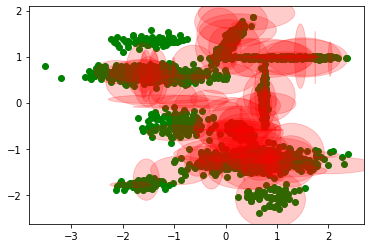

ARI: 0.7063535195428156


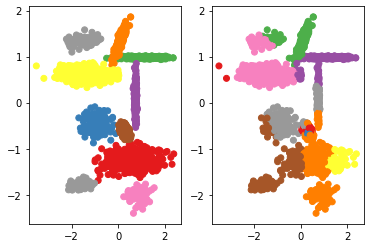

In [29]:
scaler = StandardScaler()

scaler.fit(X)
sdec_preds = sdec.differential_clustering(scaler.transform(X), y, N_ITER, crowding=True, smart_init=False, wait_on_plots=False, verbose=False)

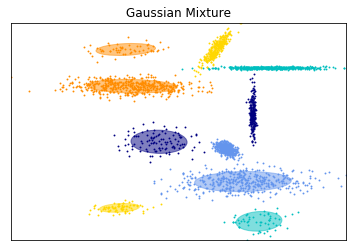

In [30]:
gm = em.gaussian_mixture(X, n_clusters=y.max()+1)
em_preds = gm.predict(X)
em.plot_results(X, em_preds, gm.means_, gm.covariances_, 'Gaussian Mixture')

In [38]:
for alg, predictions in [('EM', em_preds), ('DEC', sdec_preds)]:
    # each cluster contains only members of a single class.
    print(f"Homogeneity score - {alg}:", metrics.homogeneity_score(y, predictions))
    
    # all members of a given class are assigned to the same cluster.
    print(f"Completeness score - {alg}:", metrics.completeness_score(y, predictions))
    
    # harmonic mean between homogeneity score and completness score
    print(f"V score - {alg}:", metrics.v_measure_score(y, predictions))
    
    # measures the similarity of the two assignments
    print(f"ARI - {alg}:", metrics.adjusted_rand_score(y, predictions))
    print("")

Homogeneity score - EM: 0.9976097881518651
Completeness score - EM: 0.9973018371133938
V score - EM: 0.9974557888636963
ARI - EM: 0.9982089084808446

Homogeneity score - DEC: 0.82741263350268
Completeness score - DEC: 0.7619830801225594
V score - DEC: 0.7933511102413213
ARI - DEC: 0.6536388093206419



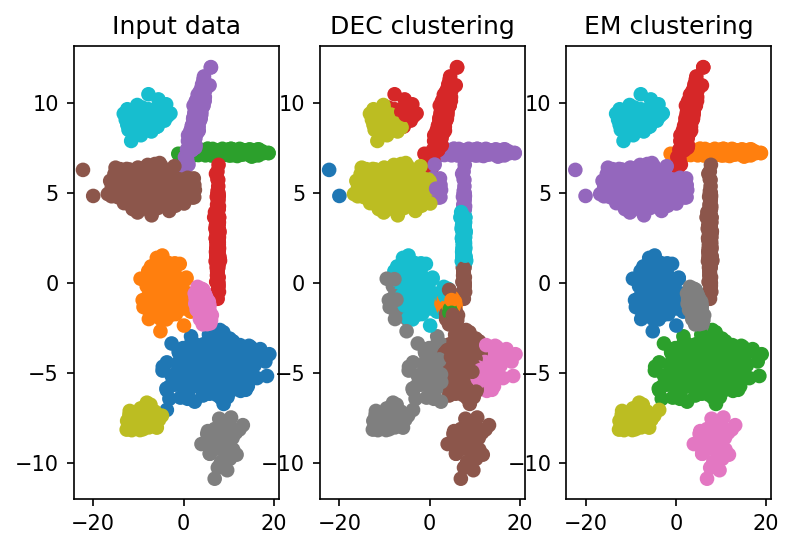

In [32]:
fig, axs = plt.subplots(ncols=3, dpi=150)

axs[0].scatter(X[0], X[1], c=y, cmap='tab10')
axs[0].set_title('Input data')

axs[1].scatter(X[0], X[1], c=sdec_preds, cmap='tab10')
axs[1].set_title('DEC clustering')

axs[2].scatter(X[0], X[1], c=em_preds, cmap='tab10')
axs[2].set_title('EM clustering')

plt.show()
plt.close(fig)

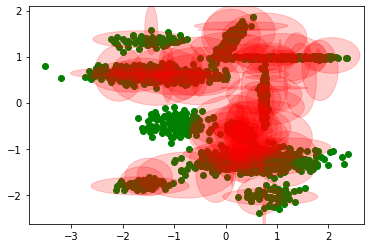

ARI: 0.6645294333847876


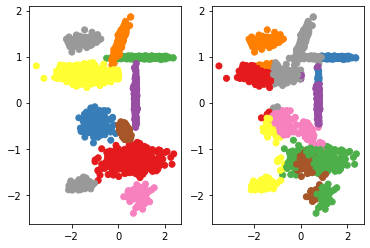

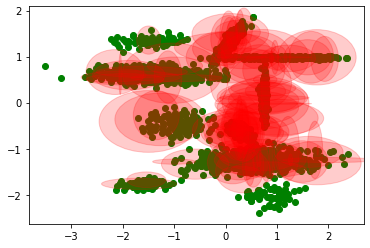

ARI: 0.7320694510596636


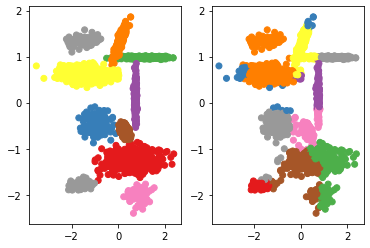

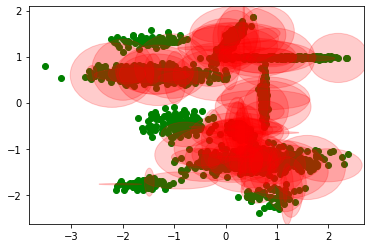

ARI: 0.6078415163014375


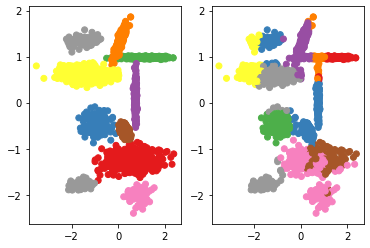

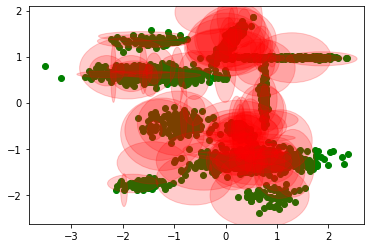

ARI: 0.5739042659994965


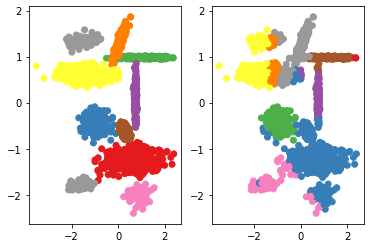

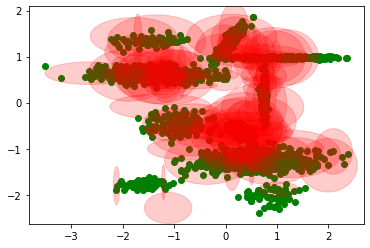

ARI: 0.8066807493081128


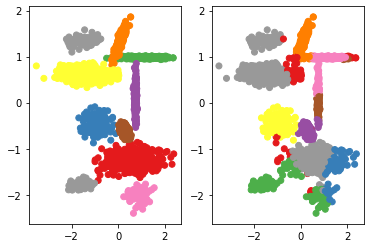

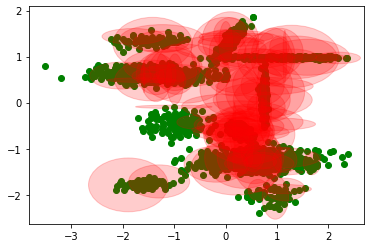

ARI: 0.6160537666966504


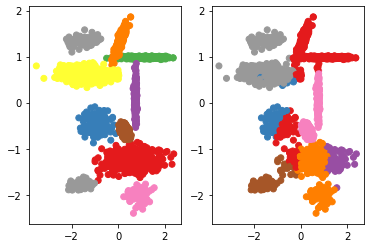

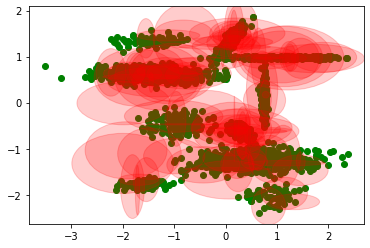

ARI: 0.6836388433941292


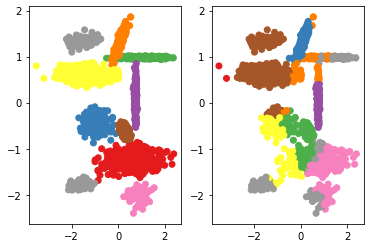

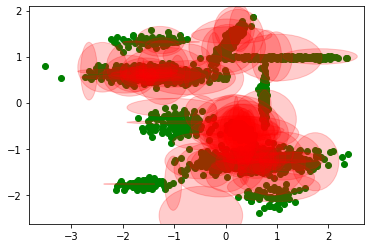

ARI: 0.4647674228833777


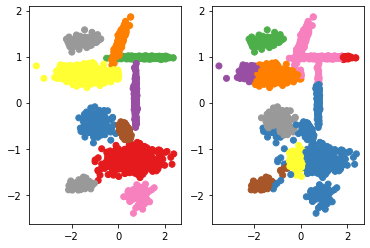

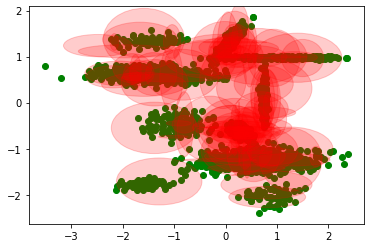

ARI: 0.533891427252458


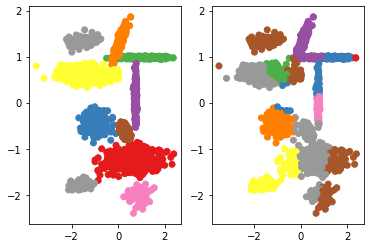

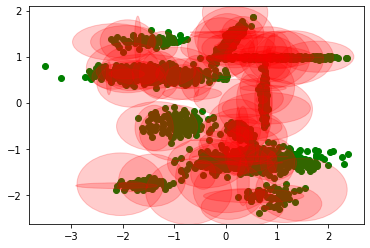

ARI: 0.5553236056665476


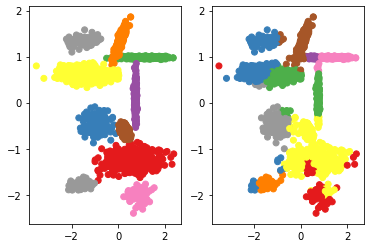

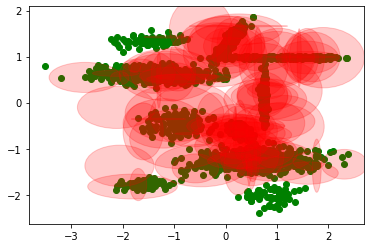

ARI: 0.8134815305864311


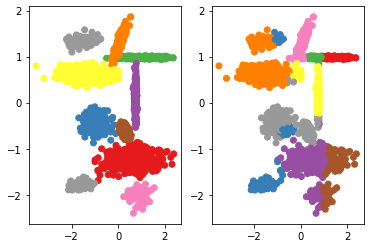

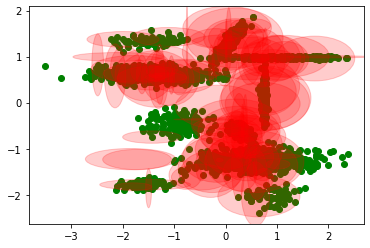

ARI: 0.7656181389543263


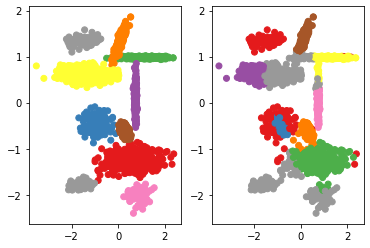

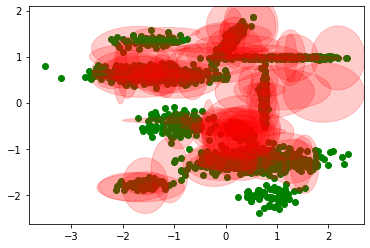

ARI: 0.6209193825803444


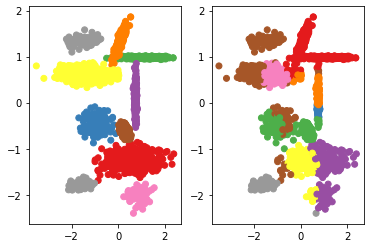

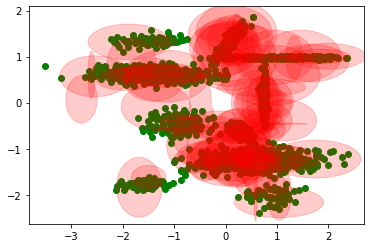

ARI: 0.6813367177958989


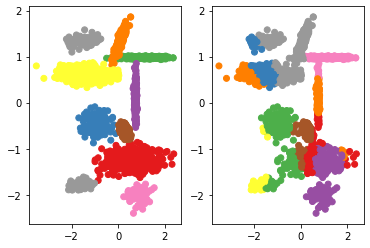

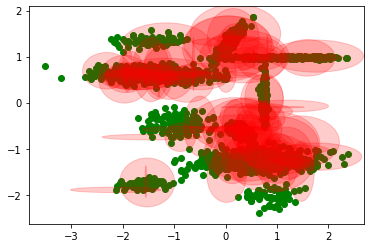

ARI: 0.5614819077401385


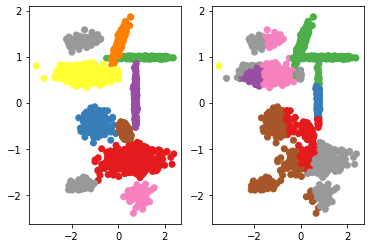

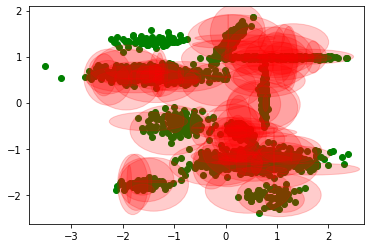

ARI: 0.7361136055172648


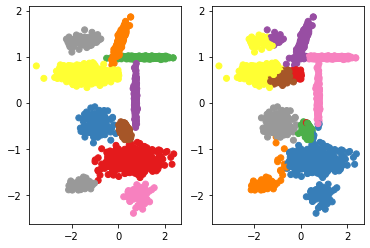

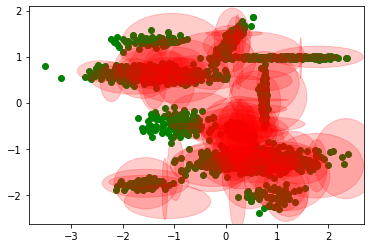

ARI: 0.5870068762786835


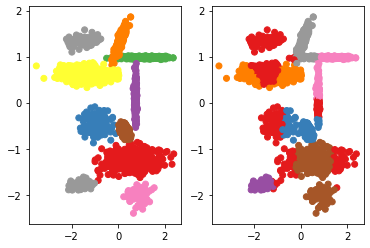

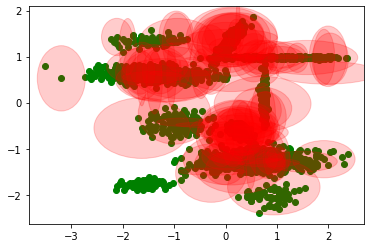

ARI: 0.5038981672170955


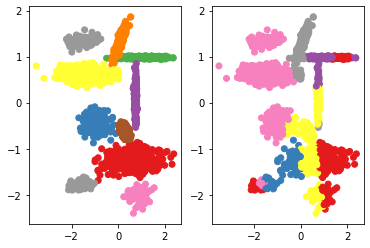

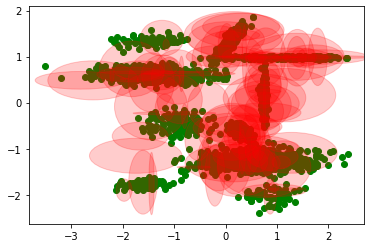

ARI: 0.7176581614420364


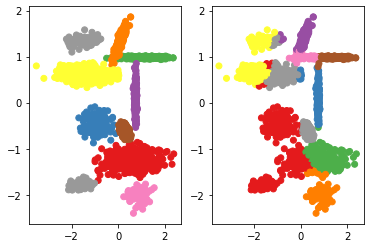

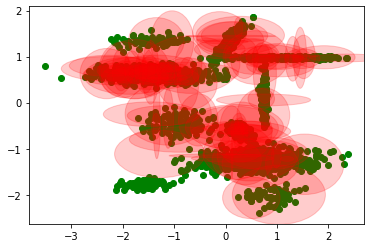

ARI: 0.6536388093206419


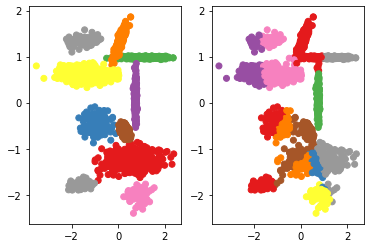

In [33]:
sdec_predictions = []
em_predictions = []

for _ in range(20):
    sdec_preds = sdec.differential_clustering(scaler.transform(X), y, N_ITER, crowding=True, smart_init=False, wait_on_plots=False, verbose=False)
    gm = em.gaussian_mixture(X, n_clusters=y.max()+1)
    em_preds = gm.predict(X)
    
    sdec_predictions.append(sdec_preds)
    em_predictions.append(em_preds)

In [50]:
em_v_scores = []
sdec_v_scores = []

em_ari_scores = []
sdec_ari_scores = []

for alg, predictions, ari_scores, v_scores in [('EM', em_predictions, em_ari_scores, em_v_scores), ('DEC', sdec_predictions, sdec_ari_scores, sdec_v_scores)]:
    # each cluster contains only members of a single class.
    print(f"Homogeneity score mean - {alg}:", sum([metrics.homogeneity_score(y, prediction) for prediction in predictions])/20)
    
    # all members of a given class are assigned to the same cluster.
    print(f"Completeness score mean - {alg}:", sum([metrics.completeness_score(y, prediction) for prediction in predictions])/20)
    
    # harmonic mean between homogeneity score and completness score
    _v_scores = [metrics.v_measure_score(y, prediction) for prediction in predictions]
    v_scores.append(_v_scores)
    print(f"V score mean - {alg}:", sum(_v_scores)/20)
    
    # measures the similarity of the two assignments
    _ari_scores = [metrics.adjusted_rand_score(y, prediction) for prediction in predictions]
    ari_scores.append(_ari_scores)
    print(f"ARI mean - {alg}:", sum(_ari_scores)/20)
    print("")
    
scores = pd.DataFrame()
scores["em_v_score"] = em_v_scores[0]
scores["sdec_v_score"] = sdec_v_scores[0]
scores["em_ari_score"] = em_ari_scores[0]
scores["sdec_ari_score"] = sdec_ari_scores[0]

Homogeneity score mean - EM: 0.9771688399108166
Completeness score mean - EM: 0.9653432125601782
V score mean - EM: 0.9711154921684543
ARI mean - EM: 0.9529839761079308

Homogeneity score mean - DEC: 0.7559736447465678
Completeness score mean - DEC: 0.7879819429946184
V score mean - DEC: 0.7694434151962752
ARI mean - DEC: 0.643992688968976



In [56]:
scores.describe()

,em_v_score,sdec_v_score,em_ari_score,sdec_ari_score
count,20.000000,20.000000,20.000000,20.000000
mean,0.971115,0.769443,0.952984,0.643993
std,0.030468,0.050970,0.056465,0.098531
min,0.916082,0.647545,0.812055,0.464767
25%,0.943341,0.732650,0.919713,0.570799
50%,0.997456,0.773017,0.998209,0.637279
75%,0.997456,0.802537,0.998209,0.721261
max,0.997456,0.847954,0.998209,0.813482


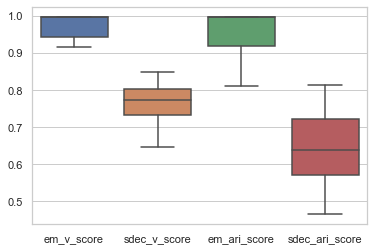

In [55]:
import seaborn as sns
sns.set_theme(style="whitegrid")

ax = sns.boxplot(data=scores)